# Linear Regression Part 01 (MPG Forcasting Model)
Linear Regression is used to establish a linear relationship between a dependent variable (target) and one or more independent variables (features). It assumes a linear relationship between these variables, meaning the change in the dependent variable is proportional to changes in the independent variables. The goal of linear regression is to find the best-fitting straight line through the data points, typically using the method of least squares.

## Dataset
- We'll work on the mpg dataset which is build into the Seaborn Libary.
- mpg dataset is a measurement of a vehicle's fuel efficiency. It indicates how many miles a car can travel on one gallon of fuel.

## Libraries
- Numpy and pandas
- Matplotlib and Seaborn
- Warnings (to avoid minor errors)

# Import libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
# Loading mpg dataset from seaborn library
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Sanity Check
- Remove Duplicate Columns
- Remove Unnecessary Columns
- Formatting Columns Names

## Duplicate Check

In [4]:
# check total duplicate values
df.duplicated().sum()

np.int64(0)

## Standardize Column Names and Removes Unuseful Columns

In [5]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
# remove unuseful columns
df.drop('name', axis=1, inplace=True)

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [7]:
# rename column names
df.rename(columns={"model_year" : "model year"}, inplace=True)

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [8]:
# Meaningful column value replacements
df['model year'] = 1900 + df["model year"]

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


# Handling Missing Values

In [9]:
# check null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
# check null data
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,1971,usa
126,21.0,6,200.0,NaN,2875,17.0,1974,usa
330,40.9,4,85.0,NaN,1835,17.3,1980,europe
336,23.6,4,140.0,NaN,2905,14.3,1980,usa
354,34.5,4,100.0,NaN,2320,15.8,1981,europe
374,23.0,4,151.0,NaN,3035,20.5,1982,usa


**NOTE:** Since there is no significate data loss, we can drop the NaN Values

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
# dataset review with new changes
row, col = df.shape
print("Number of Rows:", row)
print("Number of Columns:", col)

Number of Rows: 392
Number of Columns: 8


In [13]:
# recheck null values (return true if any)
df.isnull().sum().any()

np.False_

**NOTE:** Since **`df.isnull().sum().any()`** returned false, there is no more null values

# Exploratory Data Analysis (EDA)

**Quick overview of the dataset**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


**Summary of the dataset**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,1975.979592,3.683737,1970.0,1973.000,1976.00,1979.000,1982.0


## Univariate Analysis

### countplot For Unique Value Distribution

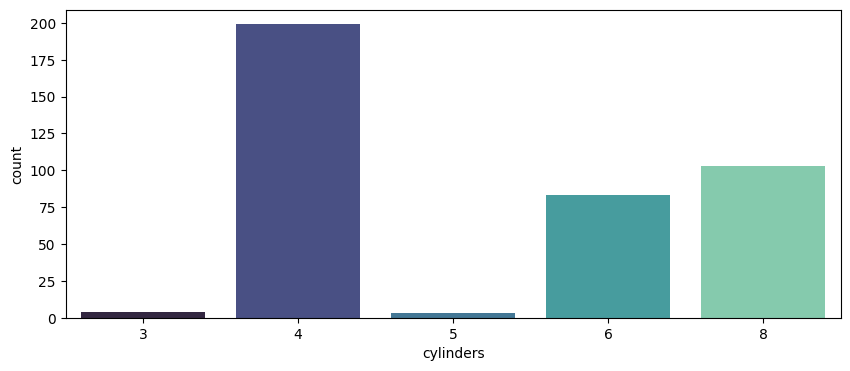

In [ ]:
# Figure size
plt.figure(figsize=(10, 4))

# countplot for cylinders
sns.countplot(data=df, x="cylinders", palette="mako")
plt.show()

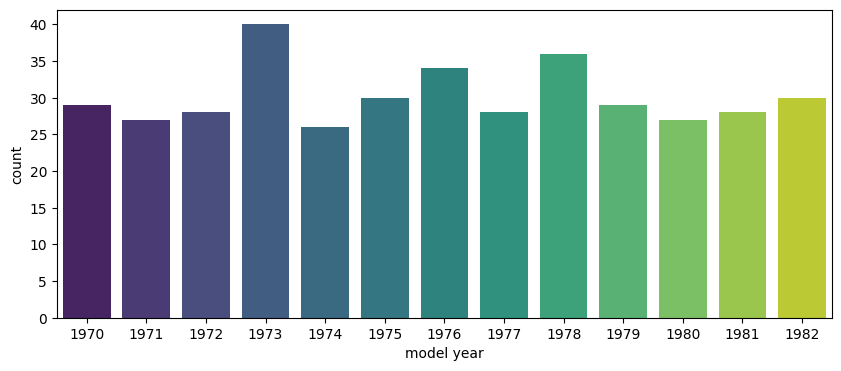

In [ ]:
# Figure size
plt.figure(figsize=(10, 4))

# countplot for model year
sns.countplot(data=df, x="model year", palette="viridis")

plt.show()

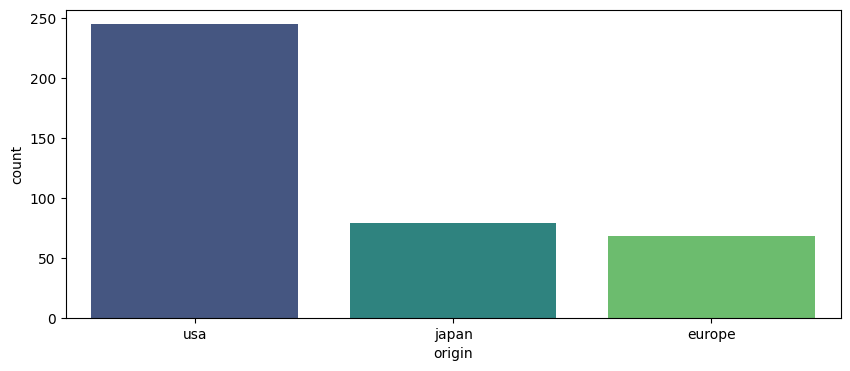

In [ ]:
# Figure size
plt.figure(figsize=(10, 4))

# countplot for origin
sns.countplot(data=df, x="origin", palette="viridis")

plt.show()

### distplot for Data Distribution

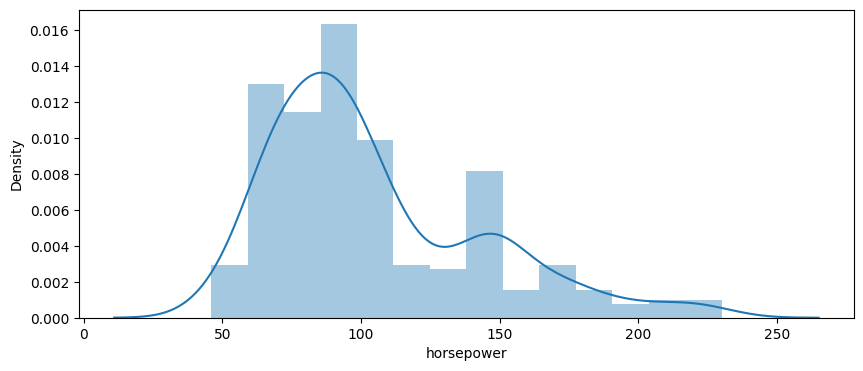

In [ ]:
# Figure size
plt.figure(figsize=(10, 4))

# distplots for horsepower
sns.distplot(df["horsepower"])

plt.show()

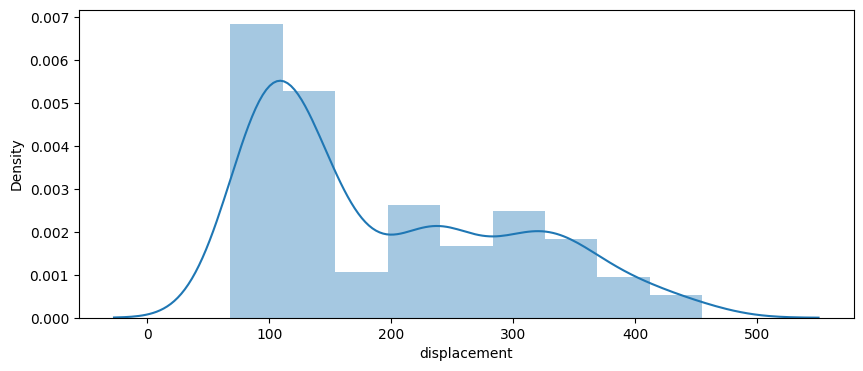

In [ ]:
# figure size
plt.figure(figsize=(10, 4))

# distplots for displacement
sns.distplot(df["displacement"])

plt.show()

## Bivariate Analysis

### Boxplot for examining relation between target and other variables

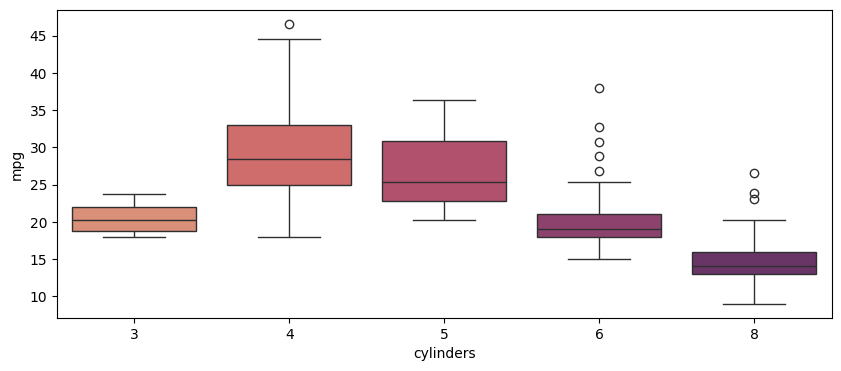

In [21]:
# figure size
plt.figure(figsize=(10, 4))

# boxplot for mpg vs cylinders
sns.boxplot(data=df, x = "cylinders", y = "mpg", palette="flare")

# show the plot
plt.show()


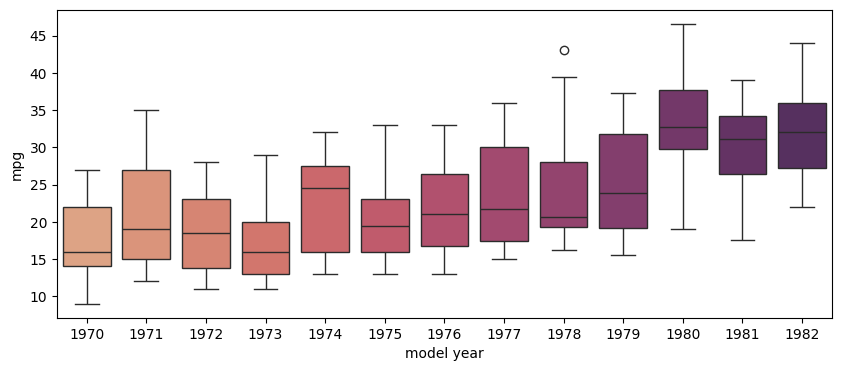

In [23]:
# figure size
plt.figure(figsize=(10, 4))

# boxplot for mpg vs model year
sns.boxplot(data=df, x= "model year", y = "mpg", palette="flare")

# show the plot
plt.show()

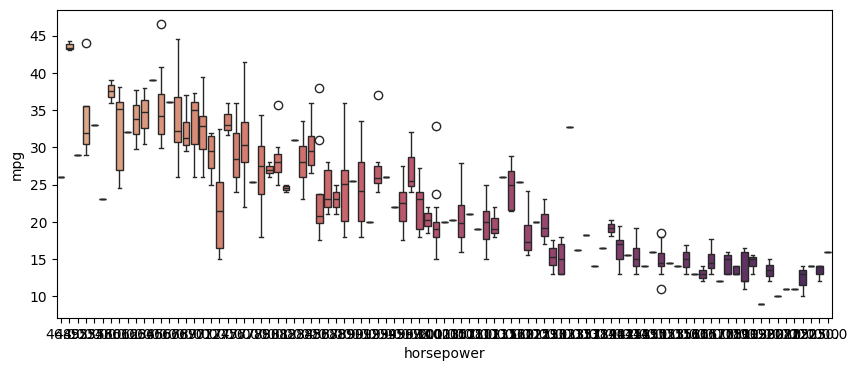

In [24]:
# figure size
plt.figure(figsize=(10, 4))

# boxplot for mpg vs horsepower
sns.boxplot(data=df, x= "horsepower", y = "mpg", palette="flare")

# show the plot
plt.show()